In [12]:
# Directories
import os
os.chdir(r"E:\academy\3. IIT DELHI\2. Academics\1_PAPER\2_Analysis")
print(os.getcwd())


E:\academy\3. IIT DELHI\2. Academics\1_PAPER\2_Analysis


In [19]:
#Array packages
import pandas as pd
import numpy as np
import xarray as xr
import netCDF4 as nc4
from dask.distributed import Client

from scipy.stats import kendalltau
import pymannkendall as mk

#plots
import numpy as np 
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import geopandas as gpd
import matplotlib
import xarray as xr
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.colors as clr
import seaborn 
import scienceplots
import matplotlib.ticker as ticker
#plt.rcParams["font.weight"] = "bold"
plt.style.use(['science','no-latex','bright'])

#Progress meter
from dask.diagnostics import ProgressBar
from tqdm import tqdm

# Directories
import os
import glob
import dask
#import h5netcdf
import scipy

import xarrayMannKendall as XMK


In [20]:
model=["LIS_MERRA2","LIS_IMD","LIS_CHIRPS","LIS_ERA5"]
ls=[]
mdl="LIS_MERRA2"
lsm_M = xr.open_mfdataset(f"DATA_p/{mdl}_1980_2021.nc",engine='netcdf4', parallel=True,chunks={'time': 'auto'})
lsm_M=lsm_M*60*60*24*30 #converting to mm/ month
lsm_M

<xarray.Dataset>
Dimensions:           (time: 504, lat: 320, lon: 300, SoilMoist_profiles: 4)
Coordinates:
  * time              (time) datetime64[ns] 1980-01-31 1980-02-29 ... 2021-12-31
  * lat               (lat) float64 5.55 5.65 5.75 5.85 ... 37.25 37.35 37.45
  * lon               (lon) float64 68.05 68.15 68.25 ... 97.75 97.85 97.95
Dimensions without coordinates: SoilMoist_profiles
Data variables: (12/17)
    Swnet_tavg        (time, lat, lon) float32 dask.array<chunksize=(349, 320, 300), meta=np.ndarray>
    Lwnet_tavg        (time, lat, lon) float32 dask.array<chunksize=(349, 320, 300), meta=np.ndarray>
    Qle_tavg          (time, lat, lon) float32 dask.array<chunksize=(349, 320, 300), meta=np.ndarray>
    Qh_tavg           (time, lat, lon) float32 dask.array<chunksize=(349, 320, 300), meta=np.ndarray>
    Qg_tavg           (time, lat, lon) float32 dask.array<chunksize=(349, 320, 300), meta=np.ndarray>
    Snowf_tavg        (time, lat, lon) float32 dask.array<chunksize=(349, 320, 300), meta=np.ndarray>
    ...                ...
    SnowDepth_inst    (time, lat, lon) float32 dask.array<chunksize=(349, 320, 300), meta=np.ndarray>
    SoilMoist_tavg    (time, SoilMoist_profiles, lat, lon) float32 dask.array<chunksize=(87, 4, 320, 300), meta=np.ndarray>
    WaterTableD_tavg  (time, lat, lon) float32 dask.array<chunksize=(349, 320, 300), meta=np.ndarray>
    TWS_tavg          (time, lat, lon) float32 dask.array<chunksize=(349, 320, 300), meta=np.ndarray>
    GWS_tavg          (time, lat, lon) float32 dask.array<chunksize=(349, 320, 300), meta=np.ndarray>
    TotalPrecip_tavg  (time, lat, lon) float32 dask.array<chunksize=(349, 320, 300), meta=np.ndarray>

In [21]:
model=["LIS_MERRA2","LIS_IMD","LIS_CHIRPS","LIS_ERA5"]
ssn=["June","July","August","Monsoon","Winter"]
ls=[]
for mdl in model:
    lsm_M = xr.open_mfdataset(f"DATA_p/{mdl}_1980_2021.nc",engine='netcdf4', parallel=True,chunks={'time': 'auto'})
    lsm_M=lsm_M*60*60*24*30 #converting to mm/ month
    lsm_M=lsm_M[['TotalPrecip_tavg','Qs_tavg']]
    RE=lsm_M["Qs_tavg"]/lsm_M["TotalPrecip_tavg"]
    lsm_M['RE']=RE
    lsm_M_c=lsm_M.where(RE<1)
    lsm_norm=lsm_M_c
    #lsm_monthly  =  lsm_M_c.groupby('time.month')
    #lsm_mean     =  lsm_M_c.groupby('time.month').mean(dim='time')
    #lsm_anom = lsm_monthly-lsm_mean  
    #lsm_std  = lsm_M_c.groupby('time.month').std(dim='time')
    #lsm_norm = (lsm_anom.groupby('time.month'))/lsm_std

    
    ssn_m=[[6],[7],[8],[6,7,8,9],[1,2]]
    for ss in ssn_m:
        months=lsm_norm["time.month"]
        
        da=lsm_norm.sel(time=months.isin(ss))['TotalPrecip_tavg']
        
        da=da.groupby('time.year').mean(dim='time')
        
        da=da.rename({'lat': 'y', 'lon': 'x','year':'time'})
        
        #TREND ANALYSis
        MK_test = XMK.Mann_Kendall_test(da, 'time')
        xrr=MK_test.compute()
        #xrr['trend']=xrr.trend.where(xrr.signif==1,0)    #To REMOVE NON SIGNIFICANT POINTS
        ls.append(xrr)


C:\Users\sstar\anaconda3\envs\imed\Lib\site-packages\dask\core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
C:\Users\sstar\anaconda3\envs\imed\Lib\site-packages\dask\core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
C:\Users\sstar\anaconda3\envs\imed\Lib\site-packages\dask\core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
C:\Users\sstar\anaconda3\envs\imed\Lib\site-packages\dask\core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
C:\Users\sstar\anaconda3\envs\imed\Lib\site-packages\dask\core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
C:\Users\sstar\anaconda3\envs\imed\Lib\site-packages\dask\core.py:119: RuntimeWarning: invalid value e

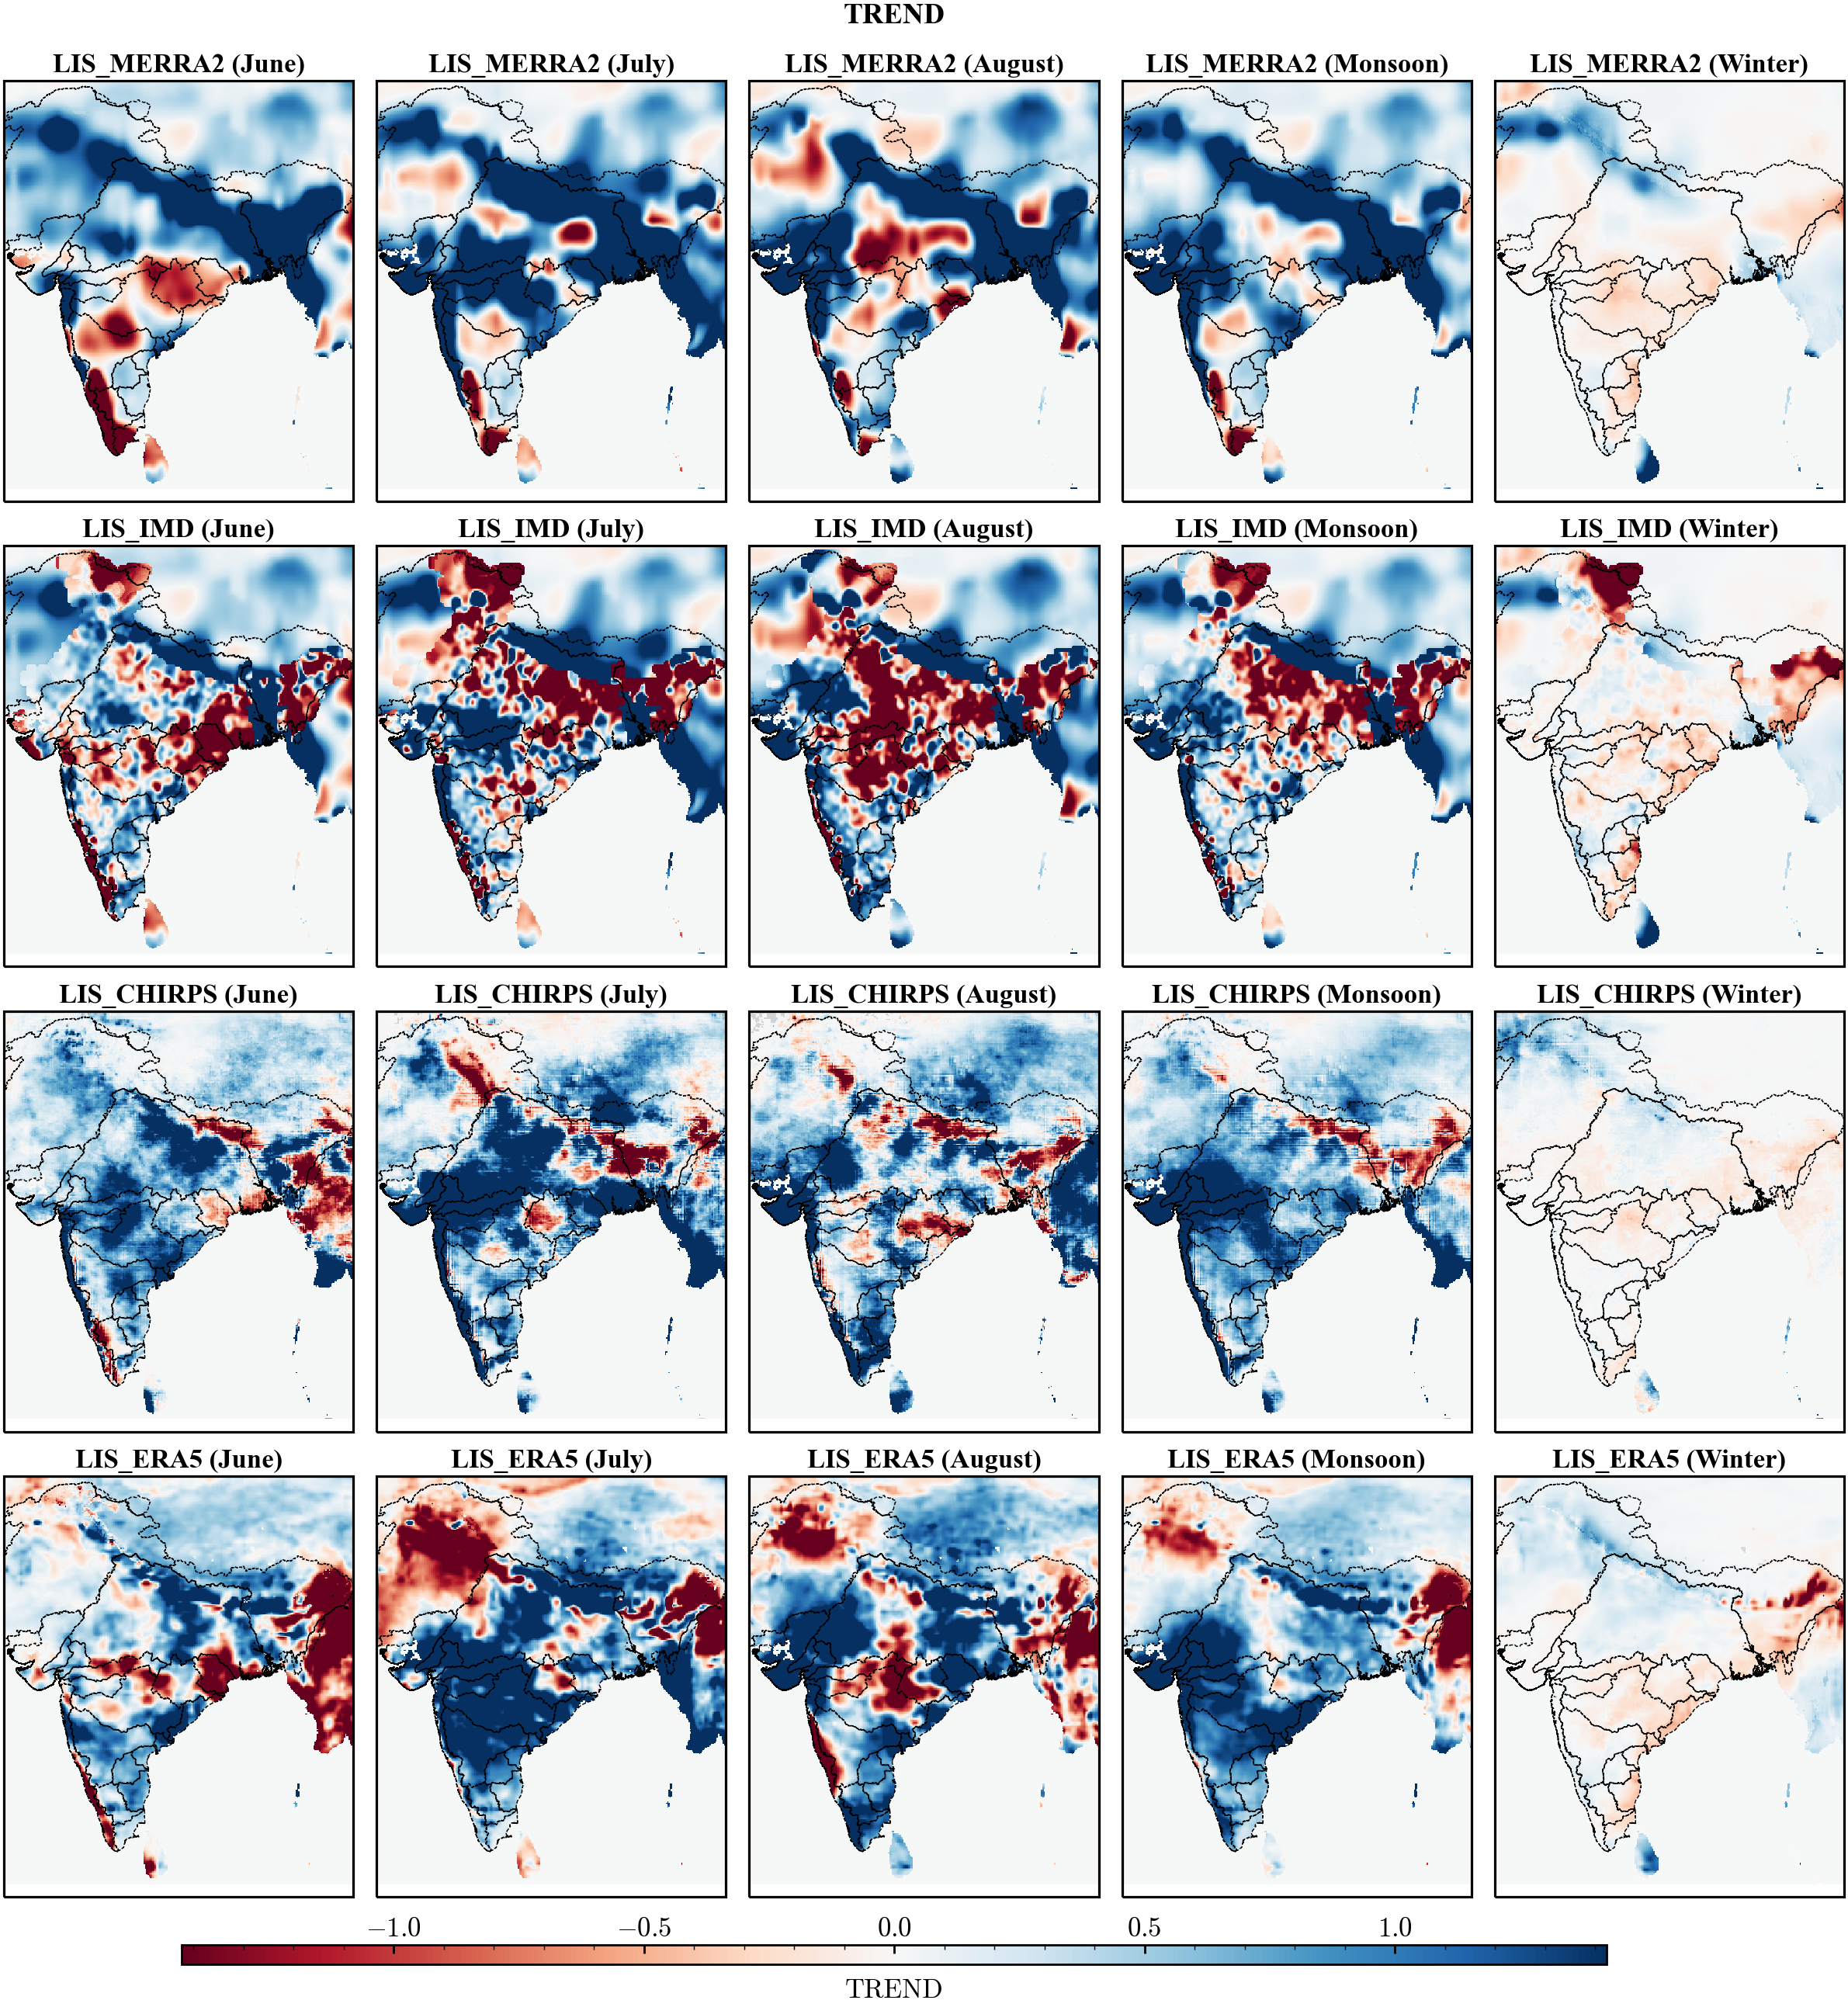

In [23]:
plt_tit=[[a, b] for a in model for b in ssn]

cbar_tit='TREND'
main_tit='TREND'
Map_plot1(ls,[4,5],plt_tit,main_tit)  
plt.savefig(f'1_Validation/trend.jpeg', bbox_inches='tight')

## MAP FUNCTION

In [22]:
def Map_plot1(xrr,col_row,plt_tit,cbar_tit):

    c=col_row[1]
    r=col_row[0]
    # Define the parameters
    B=5   # THis is the base scale. one figure dimension. All are determined based on this
    wd_sp=1.4
    hg_sp=2
    bt = 1.5  # bottom space
    
    fig_len=c*5 + wd_sp*(c-1)
    fig_hg=r*5.2 + hg_sp*(r-1) +bt   #This 1.15 depend on the subplot dimension. This case, height of subplot more than length
    fnt = B*5
    pd = B*1.6
    ln_wd = B*0.2
    
    fig, axs = plt.subplots(col_row[0],col_row[1],subplot_kw={'projection': ccrs.PlateCarree()},figsize=(fig_len,fig_hg),constrained_layout=False)
    axs=axs.flatten()


    
    #Adding feature maps
    basin_map = gpd.read_file('DATA_p/Shapefiles/Indian_basin/India_transboundary.shp')
    ind_map = gpd.read_file('DATA_p/Shapefiles/Indian_map/India_country.shp')

    #define plot variables
    vmin1 = -max(abs(xrr[0]["trend"].quantile(0.1)), abs(xrr[0]["trend"].quantile(0.9)))
    vmax1 = -vmin1
    cmap2='RdBu'


    #Loop over all of the models
    for i,model in enumerate(range(len(xrr))):

            # Axis setttings
            data=xrr[i].trend

            axs[i].set_extent([67.90, 97.59,4.5, 37.50], ccrs.PlateCarree())

            [x.set_linewidth(2.3) for x in axs[i].spines.values()]        #bOUNDARY WIDTHH 

            cmap1 = clr.LinearSegmentedColormap.from_list('blue_to_white', ['lightgrey', '#FFFFFF'], N=256)
            gradient = np.linspace(0, 1, 256).reshape(-1, 1)
            axs[i].imshow(gradient, cmap=cmap1, extent=[67.90, 97.59,4.5, 37.50], transform=ccrs.PlateCarree())    

            axs[i].set_title(f"{plt_tit[i][0]} ({plt_tit[i][1]})",fontsize=fnt,pad=pd,fontname='Times New Roman',weight='bold')


            # Adding Mainplo
            Main_plot=data.plot(vmin=vmin1,vmax=vmax1 ,ax=axs[i], cmap=cmap2, add_labels=False, add_colorbar=False) 

            # Adding addition feature 
            basin_map.plot(ax=axs[i],color = 'none',edgecolor = 'black',linewidth=ln_wd,linestyle='--')



    # Adjust the location of the subplots on the page to make room for the colorbar
    fig.subplots_adjust(bottom=1.5/fig_hg, left=None, top=None, right=None, wspace=2/fig_len, hspace=3/fig_hg)  # First lock bottom, while make others None (automatically select), Then change spaces

    # Add a colorbar axis at the bottom of the graph
    cbar_ax = fig.add_axes([0.2, 0.63/fig_hg, 0.6, 0.25/fig_hg])   # left,bottom, widht, height

    # Draw the colorbar
    cbar=fig.colorbar(Main_plot, cax=cbar_ax,orientation='horizontal') #,ticks=[0, 1,5]
    cbar.outline.set_linewidth(2) 
    cbar.ax.tick_params(axis='both',which='both', labelsize=fnt,width=2, length=8) 
    cbar.ax.tick_params(axis='both',which='minor', labelsize=fnt*0.7,width=1, length=4) 
    cbar.ax.xaxis.set_ticks_position('top')
    cbar.ax.xaxis.set_label_position('top')

    cbar.set_label(cbar_tit, fontsize=fnt*1, labelpad=-75,weight="bold")#position=(0.5, -0.5)
    cbar.ax.xaxis.label.set_fontweight('bold')

    fig.suptitle(main_tit, fontsize=27, y=0.915, fontweight='bold', fontname='Times New Roman')
    
    #plt.tight_layout()  
    #plt.show()